In [17]:
import torch
import torch.nn.functional as F

In [18]:
scores = torch.rand(10)
tk = scores.topk(5).indices

In [19]:
w = torch.tensor([1/(k+1) for k in range(5)], dtype=torch.float32, requires_grad=True)

s = F.softmax(w, dim=0)
ls = F.log_softmax(w, dim=0)
w,s,ls

(tensor([1.0000, 0.5000, 0.3333, 0.2500, 0.2000], requires_grad=True),
 tensor([0.3288, 0.1994, 0.1688, 0.1553, 0.1477], grad_fn=<SoftmaxBackward0>),
 tensor([-1.1124, -1.6124, -1.7791, -1.8624, -1.9124],
        grad_fn=<LogSoftmaxBackward0>))

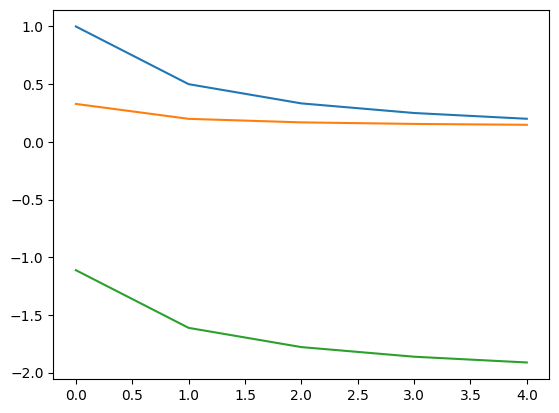

In [20]:
import matplotlib.pyplot as plt

plt.plot(w.detach().numpy(), label='w')
plt.plot(s.detach().numpy(), label='s')
plt.plot(ls.detach().numpy(), label='ls')

In [23]:
w, scores, scores[tk], scores[tk] * w, scores[tk] * s, scores[tk] * ls

(tensor([1.0000, 0.5000, 0.3333, 0.2500, 0.2000], requires_grad=True),
 tensor([0.9205, 0.1195, 0.4207, 0.6318, 0.1963, 0.6741, 0.1797, 0.6193, 0.7459,
         0.0239]),
 tensor([0.9205, 0.7459, 0.6741, 0.6318, 0.6193]),
 tensor([0.9205, 0.3729, 0.2247, 0.1580, 0.1239], grad_fn=<MulBackward0>),
 tensor([0.3026, 0.1487, 0.1138, 0.0981, 0.0915], grad_fn=<MulBackward0>),
 tensor([-1.0239, -1.2026, -1.1992, -1.1767, -1.1844], grad_fn=<MulBackward0>))

In [25]:
lscores = torch.zeros_like(scores)
lscores[tk] = scores[tk] * ls

In [26]:
lscores

tensor([-1.0239,  0.0000,  0.0000, -1.1767,  0.0000, -1.1992,  0.0000, -1.1844,
        -1.2026,  0.0000], grad_fn=<IndexPutBackward0>)

In [ ]:
scores[tk] = scores[tk] * w

In [28]:
scores = torch.rand(10)
tk = scores.topk(5).indices

w = torch.tensor([1/(k+1) for k in range(5)], dtype=torch.float32, requires_grad=True)
ls = F.log_softmax(w, dim=0)

lscores = torch.zeros_like(scores)
lscores[tk] = scores[tk] * ls
scores, lscores

(tensor([0.2354, 0.6039, 0.3375, 0.7665, 0.7575, 0.3047, 0.1899, 0.9926, 0.5916,
         0.6377]),
 tensor([ 0.0000, -1.1550,  0.0000, -1.2360, -1.3476,  0.0000,  0.0000, -1.1042,
          0.0000, -1.1876], grad_fn=<IndexPutBackward0>))

In [30]:
label = torch.tensor([3])
criterion = torch.nn.NLLLoss()

loss = criterion(lscores.unsqueeze(0), label)
loss

tensor(1.2360, grad_fn=<NllLossBackward0>)

In [31]:
torch.nn.CrossEntropyLoss()(scores.unsqueeze(0), label)

tensor(2.1095)

In [9]:
with open("out/official/20241230_225438/predictions.csv", "r") as f:
    lines = f.readlines()
    sorted_lines = [lines[0]] + sorted(lines[1:], key=lambda x: x.split(",")[0])
    out = open("out/official/20241230_225438/predictions_sorted.csv", "w")
    out.writelines(sorted_lines)
    out.close()
    

In [9]:
lines = string.split("\n")[2:]
ids = [line.split(",")[0] for line in lines if line]
set(ids)

{'015feb78.jpg',
 '1b1cb42a.jpg',
 '1bb5fbe9.jpg',
 '2087ab41.jpg',
 '24f6dcbc.jpg',
 '305d1b35.jpg',
 '3a88e5ef.jpg',
 '3f4e9298.jpg',
 '5a4adfa7.jpg',
 '6d071aa8.jpg',
 '781377a0.jpg',
 '8061d124.jpg',
 'bb4a8f50.jpg',
 'bc18ebce.jpg',
 'd23113d9.jpg',
 'ec4866fa.jpg'}

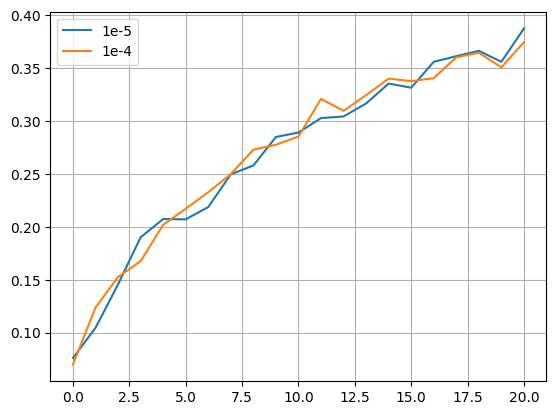

In [2]:
v1 = [
        0.07604498416185379,
        0.10456261783838272,
        0.14569273591041565,
        0.19009898602962494,
        0.20735259354114532,
        0.2070314735174179,
        0.218670055270195,
        0.24960772693157196,
        0.2579210698604584,
        0.2848547399044037,
        0.2890629172325134,
        0.3027104437351227,
        0.3042353689670563,
        0.3165213465690613,
        0.33531108498573303,
        0.3314245045185089,
        0.3558604121208191,
        0.3612196147441864,
        0.3662866950035095,
        0.3559005856513977,
        0.38739240169525146
    ]

v2 = [
        0.06988752633333206,
        0.1237620860338211,
        0.15255458652973175,
        0.1674702763557434,
        0.20187221467494965,
        0.21703679859638214,
        0.23265865445137024,
        0.24979031085968018,
        0.2728385627269745,
        0.27750009298324585,
        0.285277396440506,
        0.3208503723144531,
        0.30952364206314087,
        0.32433685660362244,
        0.3400312066078186,
        0.3376306891441345,
        0.3404051661491394,
        0.36010029911994934,
        0.36443614959716797,
        0.3506524860858917,
        0.3743954002857208
    ]

import matplotlib.pyplot as plt

plt.plot(v1)
plt.plot(v2)
plt.grid()
plt.legend(["1e-5", "1e-4"])

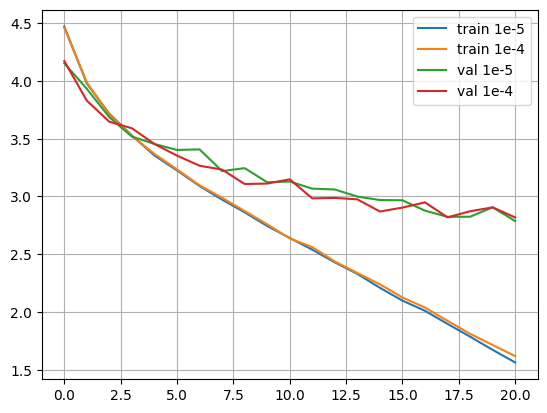

In [5]:
train_losses1 = [
        4.4712112520443705,
        3.978086848102829,
        3.7152278729590122,
        3.5273578383159876,
        3.3547287587855266,
        3.22527598493946,
        3.090318760883898,
        2.972516169776244,
        2.862917459281326,
        2.744655047916345,
        2.6406436428915643,
        2.539496624199509,
        2.42970525407671,
        2.329745886007544,
        2.2095151887432456,
        2.0984824655638534,
        2.0103318829380297,
        1.8967572762924116,
        1.7864145313762598,
        1.672578717058792,
        1.563102173865292
    ]
val_losses1 = [
    4.1526833118352675,
    3.931865364089048,
    3.6855197938761317,
    3.5180778395860717,
    3.454405691390647,
    3.402655868601978,
    3.407393987913777,
    3.219123281034312,
    3.2451847782708647,
    3.1229889572114873,
    3.1293954132194806,
    3.0677109553401634,
    3.0602846127703676,
    2.9989108411889327,
    2.9690726690722586,
    2.9668556227719876,
    2.877109056128595,
    2.823608156433679,
    2.8246182427370456,
    2.9061669595259474,
    2.7869775510372077
]

train_losses2 = [
        4.4599807947048316,
        3.986899143502454,
        3.707446957114962,
        3.523490933987596,
        3.3681379103240197,
        3.2339829581810786,
        3.0962501563113043,
        2.9883406312399607,
        2.873989565846902,
        2.75866896980055,
        2.6366450600419897,
        2.561292794549495,
        2.4368942630681345,
        2.337043546309099,
        2.2397296906118127,
        2.1254013611627767,
        2.038106669406747,
        1.9227761144301754,
        1.8110154131497784,
        1.7143884335717265,
        1.6181304490836501
    ]

val_losses2 = [
        4.171756860905123,
        3.8293172829133226,
        3.64642610227255,
        3.5901844609052613,
        3.454080515338066,
        3.353397944816073,
        3.26593544070882,
        3.232415426942639,
        3.1078176821084846,
        3.1115775699902297,
        3.148191079161221,
        2.983414275305612,
        2.987445383143604,
        2.974838964921191,
        2.869559727217022,
        2.9037389853843174,
        2.9487596839890444,
        2.8188961484378443,
        2.871830513602809,
        2.9057451791333078,
        2.81833116990283
    ]

plt.plot(train_losses1, label="train 1e-5")
plt.plot(train_losses2, label="train 1e-4")
plt.plot(val_losses1, label="val 1e-5")
plt.plot(val_losses2, label="val 1e-4")
plt.legend()
plt.grid()

In [48]:
from sklearn.model_selection import train_test_split

X = list(range(10))
y = list(range(3)) * 3 + [2]
X_train, X_test = train_test_split(
    X, test_size=0.4, random_state=42, shuffle=True, stratify=None
    )

X_train, X_test

([7, 2, 9, 4, 3, 6], [8, 1, 5, 0])

In [54]:
from torchvision.datasets import VisionDataset
from torch.utils.data import Subset
import torch

class MyDataset(VisionDataset):
    def __init__(self, root="", transform=None, target_transform=None):
        super(MyDataset, self).__init__(root, transform=transform, target_transform=target_transform)

        self.x = torch.rand(10)
        self.y = torch.randint(0, 3, (10,))
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return len(self.x)
        
        
mydataset = MyDataset("")

subset = Subset(mydataset, list(range(5)))

isinstance(mydataset, Subset)

False